# Introduction

title: "First File"
description: "Testing Quarto"
author: Laura Lu
date: "07/26/2023"
date-modified: "07/26/2023"

The SAT (Scholastic Assessment Test) is a standardized test widely used for college admissions in the United States.  The SAT covers critical reading, mathematics, and writing, and scores range from 400 to 1600.The dataset we will be exploring contains SAT scores from various states across the country, including the average total SAT scores for each state, as well as the scores for the individual sections. Additionally, the dataset includes demographic information about test-takers, such as gender, ethnicity, and socioeconomic status. Measuring and analyzing these factors enable us to investigate potential disparities in SAT performance.

How a student performs on the SAT can tremendously impact their future. Understanding the patterns in scores in light of geographical and demographical information can help identify where more academic support is needed. Affirmative action continues to be a contentious topic in today's college admission process, especially after the Supreme Court banned affirmative action. Affirmative action seeks to increase representation of underrepresented groups and promote diversity. Examining this dataset can also set the stage for future exploration of the potential educational and career outcomes of affirmative action.

Some questions that I hope to invesetigate through this project are:
1. How do states with different educational policies and funding levels perform on the SAT? 
2. Are there any correlations between SAT scores and demographic factors, such as gender, ethnicity, or socioeconomic status? 

The dataset can be accessed at this link: https://corgis-edu.github.io/corgis/csv/school_scores/

# Data Summary

Below is the code that I use to grab the csv file quickly.

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def pdcorgis(a):
  a_low = a.lower()
  # get the html page
  response = requests.get(f'https://corgis-edu.github.io/corgis/csv/{a_low}/') 

  soup = BeautifulSoup(response.text, 'html.parser')
  alink = soup.find_all('a')
  store = False
  
  for i in alink:
    if i.has_attr('download'):
        dlink = i['href']
        store = True
        break

  if (store):
    full = f'https://corgis-edu.github.io/corgis/csv/{a_low}/' + dlink
    df = pd.read_csv(full)
    return df

  return None

corgis_list = ['School_Scores']
df = pdcorgis(corgis_list[0])

### Average Total Number of Test Takers in Each State

I begin with investigating whether or not there is a geographical variance in the number of test takers. Understanding geographical variance in the number of test-takers can provide insight into the number of resources in each state which can perpetuate educational equity.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'State' and calculate the average 'Total Test-takers'
avg_total = df.groupby('State.Code')['Total.Test-takers'].mean()

# Sort the results in descending order
avg_total = avg_total.sort_values(ascending=False)

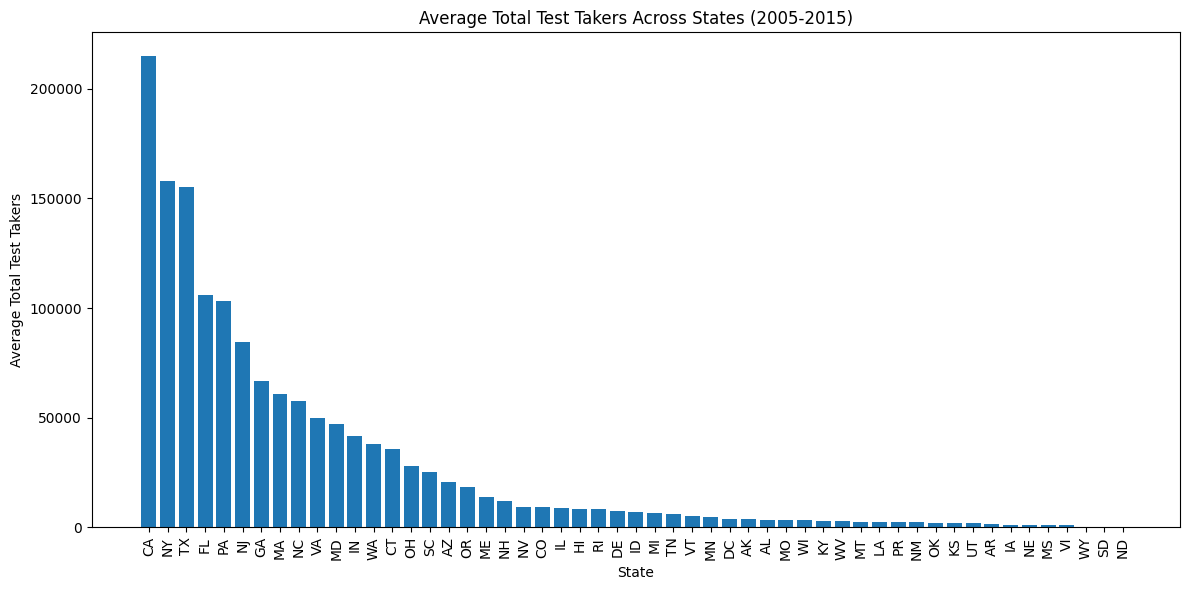

In [79]:
plt.figure(figsize=(12, 6)) 
plt.bar(avg_total.index, avg_total)

plt.xlabel('State')
plt.ylabel('Average Total Test Takers')
plt.title('Average Total Test Takers Across States (2005-2015)')

plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Above is a graph that showcases the average total test takers across States over the decade between 2005 to 2015. California has the most number of test takers while Wyoming, South Dakota and North Dakota have the least number of test takers. This suggests that there is lower test participation in these states. States with a denser population seem to have more test takers. States with higher population densities often have larger and more diverse school systems, which can lead to increased test participation due to higher student enrollments.

### Number of Test Takers in Each Income Bracket

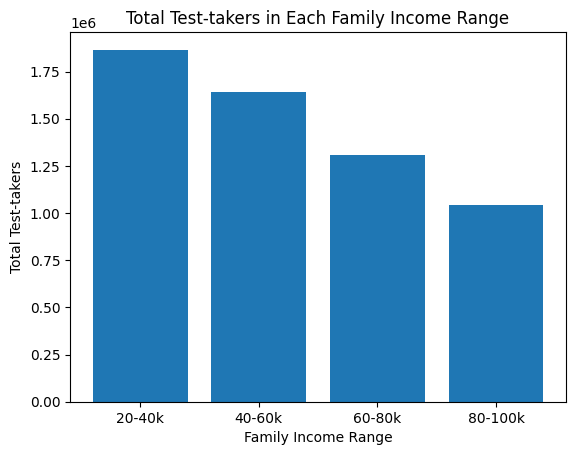

In [57]:
# Calculate the total number of test-takers in each income range
total_20_40k = df['Family Income.Between 20-40k.Test-takers'].sum()
total_40_60k = df['Family Income.Between 40-60k.Test-takers'].sum()
total_60_80k = df['Family Income.Between 60-80k.Test-takers'].sum()
total_80_100k = df['Family Income.Between 80-100k.Test-takers'].sum()

# Create a bar graph
bracket = ['20-40k', '40-60k', '60-80k', '80-100k']
count = [total_20_40k, total_40_60k, total_60_80k, total_80_100k]

plt.bar(bracket, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test-takers')
plt.title('Total Test-takers in Each Family Income Range')

plt.show()

There are more test takers in the 20-40k income range than in 40-60k, 60k-80k and 80-100k. It would be interesting to later investigate how well students in the 20-40k income bracket perform relative to 80-100k. 

### Average Combined Score Across States for Each Year

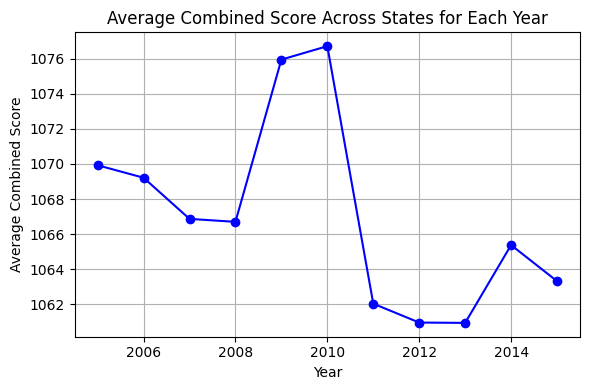

In [70]:
# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
df['Combined_Score'] = df['Total.Verbal'] + df['Total.Math']

# Group the DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = df.groupby('Year')['Combined_Score'].mean()

# Plot the data on a line graph
plt.figure(figsize=(6, 4))  # Set the size of the figure (width, height)

# Plot the average combined score against the years
plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score Across States for Each Year')

plt.grid(True) 
plt.tight_layout()  
plt.show()

The average combined score across states for each year was overall increasing between 2005 to 2010 however there was a significant dip in the score after 2010 to 2011 and since then, the average combined score has not recovered to the same score as prior to 2010. According to Yale Daily News (https://yaledailynews.com/blog/2003/11/19/class-of-2010-to-take-on-new-sat-format/), after the 2010 SAT's, the SATs added the essay section.

### Average Combined GPA Across States for Each Year

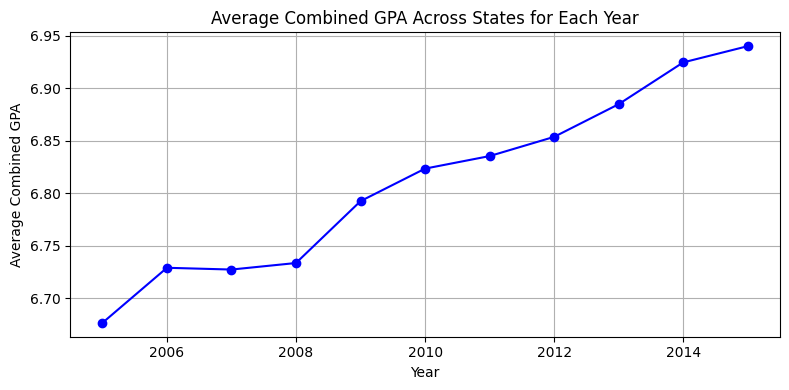

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the SAT Scores dataset into a DataFrame called 'df'
# Make sure 'df' contains columns named 'year', 'Academic Subjects.English.Average GPA', and 'Academic Subjects.Mathematics.Average GPA'

# Calculate the combined GPA by adding 'Academic Subjects.English.Average GPA' and 'Academic Subjects.Mathematics.Average GPA' for each row
df['Combined_GPA'] = df['Academic Subjects.English.Average GPA'] + df['Academic Subjects.Mathematics.Average GPA']

# Group the DataFrame by 'year' and calculate the average combined GPA for each year
average_combined_gpa = df.groupby('Year')['Combined_GPA'].mean()

# Plot the data on a line graph
plt.figure(figsize=(8, 4))  # Set the size of the figure (width, height)

plt.plot(average_combined_gpa.index, average_combined_gpa, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined GPA')
plt.title('Average Combined GPA Across States for Each Year')

plt.grid(True)  
plt.tight_layout()
plt.show()


The average combined GPA increases over the years between 2005 to 2015. The increasing trend in the average combined GPA might suggest that students, on average, are achieving higher academic performance over time. On the other hand, this may also have negative implications that I have personally felt during my application process. Inflated grades may have lead to increased competitiveness in the college application process which can also have profound effects on physical and mental health. 

## Data Analysis

### Total Test Takers in Family Income Range in Highest and Lowest Test Participating States

#### Total Test Takers in Each Family Income Range in California 

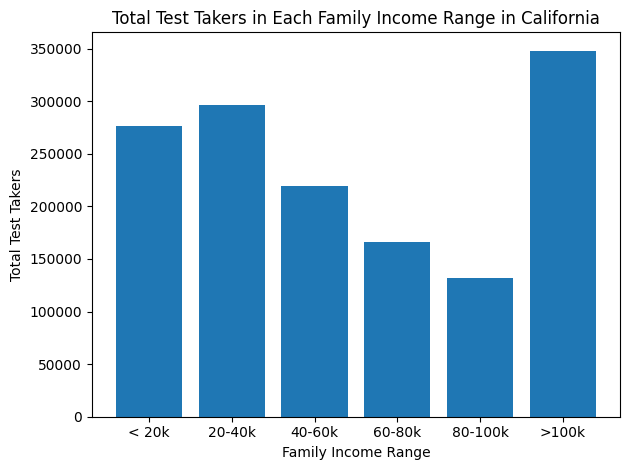

In [89]:
# Filter the data for California
california_data = df[df['State.Name'] == 'California']

# Calculate the total test takers in each family income range
total_test_takers = california_data['Total.Test-takers'].sum()
test_takers_20_40k = california_data['Family Income.Between 20-40k.Test-takers'].sum()
test_takers_40_60k = california_data['Family Income.Between 40-60k.Test-takers'].sum()
test_takers_60_80k = california_data['Family Income.Between 60-80k.Test-takers'].sum()
test_takers_80_100k = california_data['Family Income.Between 80-100k.Test-takers'].sum()
test_takers_less_than_20k = california_data['Family Income.Less than 20k.Test-takers'].sum()
test_takers_more_than_100k = california_data['Family Income.More than 100k.Test-takers'].sum()

# Create a bar graph
brackets = ['< 20k','20-40k', '40-60k', '60-80k', '80-100k', '>100k']
count = [test_takers_less_than_20k, test_takers_20_40k, test_takers_40_60k, test_takers_60_80k, test_takers_80_100k, test_takers_more_than_100k]

plt.bar(brackets, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test Takers')
plt.title('Total Test Takers in Each Family Income Range in California')

plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()

#### Total Test Takers in Each Family Income Range in Virginia 

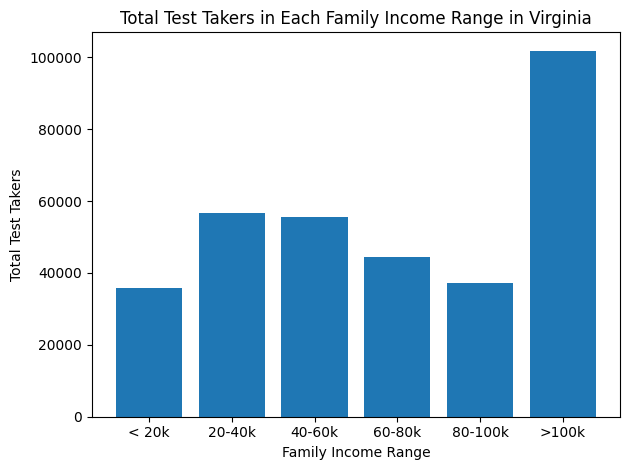

In [88]:
# Filter the data for California
Virginia = df[df['State.Name'] == 'Virginia']

# Calculate the total test takers in each family income range
total_test_takers = Virginia['Total.Test-takers'].sum()
test_takers_20_40k = Virginia['Family Income.Between 20-40k.Test-takers'].sum()
test_takers_40_60k = Virginia['Family Income.Between 40-60k.Test-takers'].sum()
test_takers_60_80k = Virginia['Family Income.Between 60-80k.Test-takers'].sum()
test_takers_80_100k = Virginia['Family Income.Between 80-100k.Test-takers'].sum()
test_takers_less_than_20k = Virginia['Family Income.Less than 20k.Test-takers'].sum()
test_takers_more_than_100k = Virginia['Family Income.More than 100k.Test-takers'].sum()

# Create a bar graph
brackets = ['< 20k','20-40k', '40-60k', '60-80k', '80-100k', '>100k']
count = [test_takers_less_than_20k, test_takers_20_40k, test_takers_40_60k, test_takers_60_80k, test_takers_80_100k, test_takers_more_than_100k]

plt.bar(brackets, count)

plt.xlabel('Family Income Range')
plt.ylabel('Total Test Takers')
plt.title('Total Test Takers in Each Family Income Range in Virginia')

plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()

### Average Combined Scores in California

/tmp/ipykernel_265/619601270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']


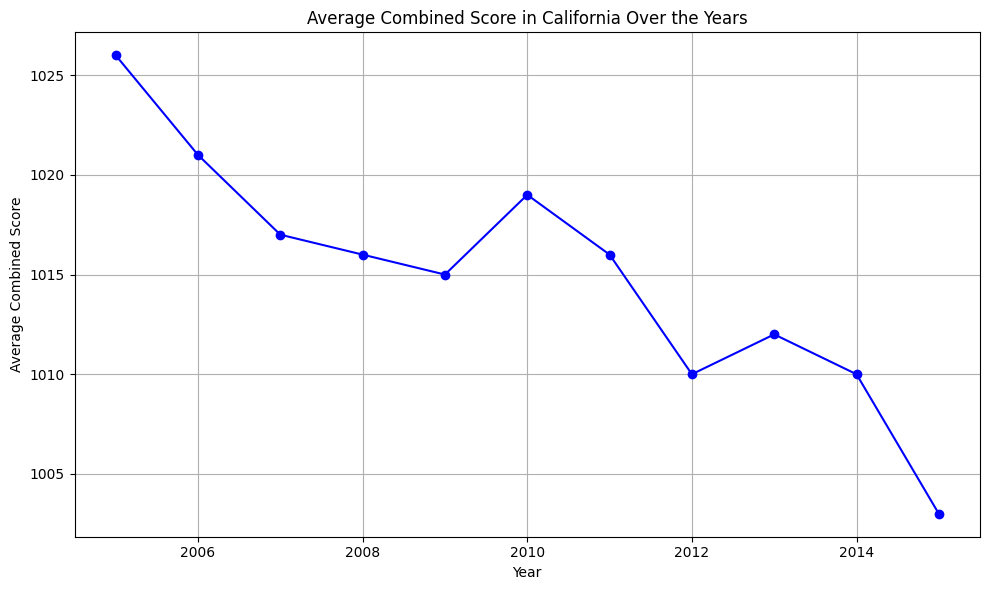

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for California
california_data = df[df['State.Name'] == 'California']

# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']

# Group the filtered DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = california_data.groupby('Year')['Combined_Score'].mean()

# Plot the data on a line graph
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)

# Plot the average combined score against the years
plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score in California Over the Years')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()


### Average Combined Scores in Virginia

/tmp/ipykernel_265/2454308043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']


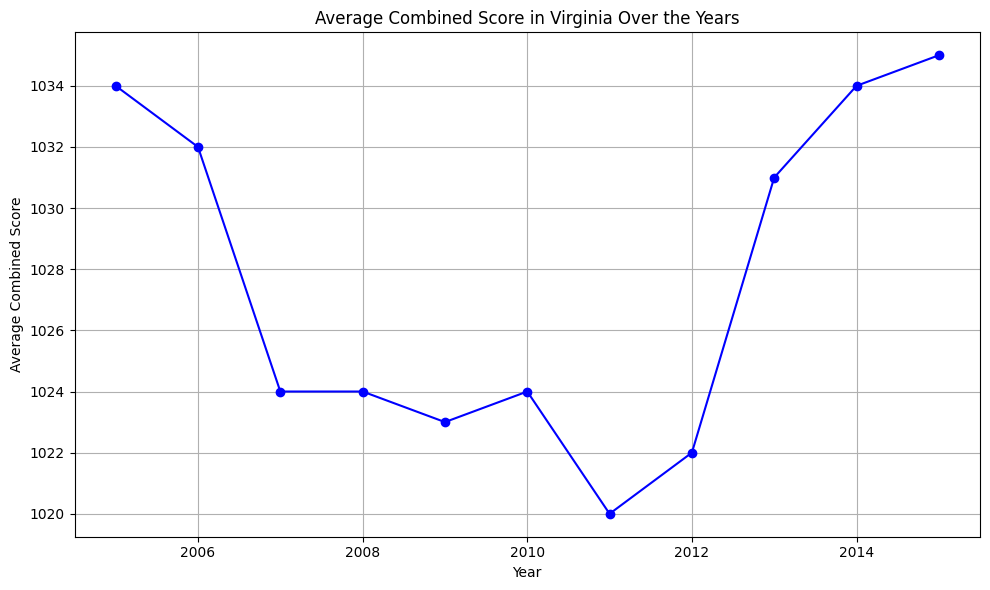

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for California
california_data = df[df['State.Name'] == 'Virginia']

# Calculate the combined score by adding 'Total.Verbal' and 'Total.Math' for each row
california_data.loc[:, 'Combined_Score'] = california_data['Total.Verbal'] + california_data['Total.Math']

# Group the filtered DataFrame by 'year' and calculate the average combined score for each year
average_combined_score = california_data.groupby('Year')['Combined_Score'].mean()

plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)

plt.plot(average_combined_score.index, average_combined_score, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Combined Score')
plt.title('Average Combined Score in Virginia Over the Years')

plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjusts the layout to prevent overlapping of labels
plt.show()


### Average Combined Scores in 20-40k Income Bracket

### Average Combined Scores in 80-100k Income Bracket